In [1]:
import sys
sys.path.append('../')
from pyACC.clustering.mock_generator import generate_gaussian_map
from pyACC.clustering.clustering_measure import get_power_spectrum

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

import camb

In [2]:
Omega_b= 0.05
Omega_c = 0.25
h=0.7
As = 2.1e-09
ns = 0.96

pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns)

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2.1e-09
 At = 1.0
 

In [3]:
pars.set_matter_power(redshifts=[10.], kmax=100.)
result = camb.get_results(pars)

In [4]:
kh, z, pk = result.get_matter_power_spectrum(minkh=1.e-4, maxkh=100, npoints=512)

In [5]:
pk.shape

(1, 512)

In [6]:
# define power spectrum interpolator
pk_func = interp1d(kh, pk[0], fill_value='extrapolate', kind='cubic')

In [7]:
# define the box
side = 500      #Mpc/h
spacing = 5     #Mpc/h

In [8]:
delta_k, delta_x = generate_gaussian_map(pk_func, side, spacing)

In [9]:
delta_k.shape

(100, 100, 51)

In [10]:
delta_x.shape

(100, 100, 100)

(array([9.00000e+00, 2.20000e+01, 6.70000e+01, 2.19000e+02, 6.96000e+02,
        1.71700e+03, 4.21500e+03, 8.80700e+03, 1.73660e+04, 3.11110e+04,
        4.91790e+04, 7.13780e+04, 9.46370e+04, 1.13388e+05, 1.23545e+05,
        1.21946e+05, 1.09395e+05, 8.87310e+04, 6.51930e+04, 4.39150e+04,
        2.69010e+04, 1.46400e+04, 7.41400e+03, 3.40300e+03, 1.36200e+03,
        4.94000e+02, 1.76000e+02, 5.10000e+01, 1.70000e+01, 6.00000e+00]),
 array([-0.88849555, -0.82874202, -0.76898849, -0.70923496, -0.64948143,
        -0.5897279 , -0.52997438, -0.47022085, -0.41046732, -0.35071379,
        -0.29096026, -0.23120674, -0.17145321, -0.11169968, -0.05194615,
         0.00780738,  0.0675609 ,  0.12731443,  0.18706796,  0.24682149,
         0.30657502,  0.36632854,  0.42608207,  0.4858356 ,  0.54558913,
         0.60534266,  0.66509619,  0.72484971,  0.78460324,  0.84435677,
         0.9041103 ]),
 <BarContainer object of 30 artists>)

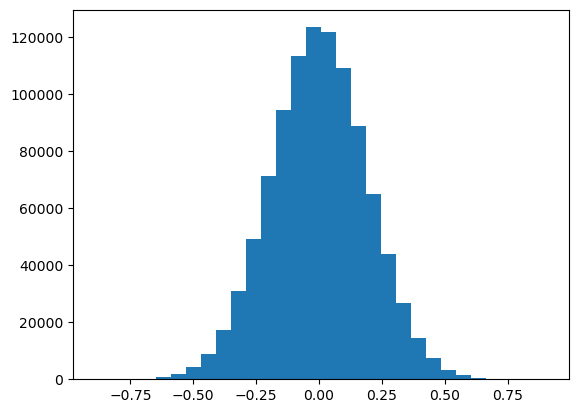

In [11]:
plt.hist(delta_x.flatten(), bins=30)

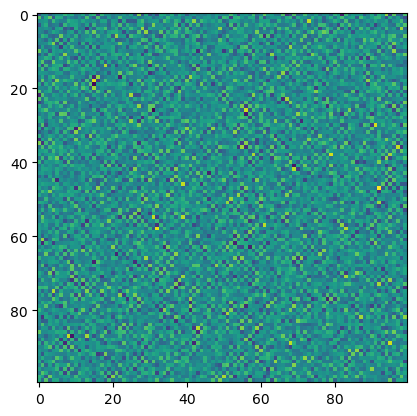

In [12]:
plt.imshow(delta_x[:,:,1])

In [13]:
n_kF = 3

k_bins, pk_meas = get_power_spectrum(delta_x, side, spacing, n_kF=n_kF)

/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


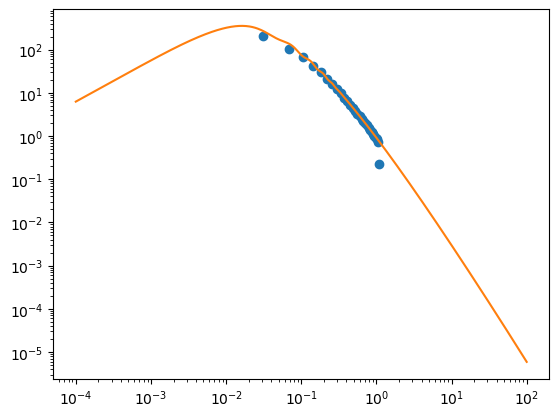

In [14]:
plt.loglog(k_bins, pk_meas, linestyle='', marker='o')
plt.loglog(kh, pk[0])

In [15]:
# generate points

n_mean = 1.e-3
Volume = side**3
N_part = Volume*n_mean

inside each cell of the grid I have no clustering info, because I am below my resolution. 

In [16]:
n_x = n_mean*(1+delta_x)

In [17]:
# number of objects in each cell
Nobj_x = n_x * spacing**3

I use Nobj_x as the mean of a multivariate Poisson distribution, defined on each cell. This gives me the number of observed galaxies in each cell of the grid. This accounts for the mistake I make when sampling the true distribution extracting a random sampling of it with my measures.

In [18]:
Npart = np.random.poisson(Nobj_x)

In [19]:
## density contrast of the sampled 
delta_N_x = Npart/np.sum(N_part)-1

discretizing the field, that is measuring it on the grid, introduces the shot noise. One wants enough clustering signal not to be dominated by the shot noise

(array([8.82284e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.10247e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        7.13700e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.28000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([-1.        , -0.99999893, -0.99999787, -0.9999968 , -0.99999573,
        -0.99999467, -0.9999936 , -0.99999253, -0.99999147, -0.9999904 ,
        -0.99998933, -0.99998827, -0.9999872 , -0.99998613, -0.99998507,
        -0.999984  , -0.99998293, -0.99998187, -0.9999808 , -0.99997973,
        -0.99997867, -0.9999776 , -0.99997653, -0.99997547, -0.9999744 ,
        -0.99997333, -0.99997227, -0.9999712 , -0.99997013, -0.99996907,
        -0.999968  ]),
 <BarContainer object of 30 artists>)

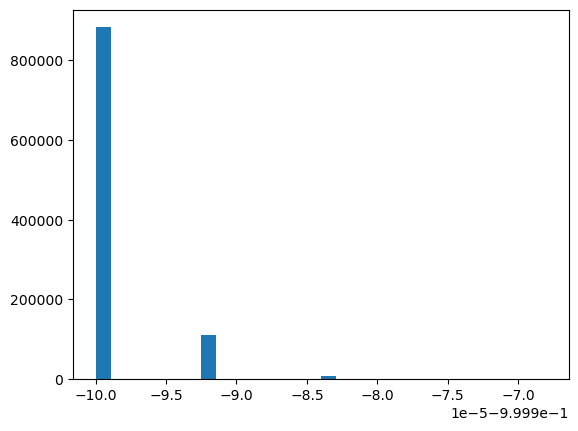

In [20]:
plt.hist(delta_N_x.flatten(), bins=30)

# 2PCF

In [21]:
from pyACC.clustering.power_spectrum import count_pairs

ModuleNotFoundError: No module named 'pyACC.clustering.power_spectrum'

In [ ]:
data = np.random.uniform(0,side, (10000,3))

In [ ]:
from scipy.spatial import cKDTree

In [ ]:
tree = cKDTree(data)

In [ ]:
plt.plot(data[:,0], data[:,1], 'o')
plt.plot(data[77,0], data[77,1], color='red', marker='o')
neighbours = tree.query_ball_point(data[77,:], 10)
plt.plot(neighbours[:,0], neighbours[:,1], color='red', marker='o')